# Unsupervised Machine Learning

In [774]:
# importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
import sklearn.metrics as sm
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [873]:
# Reading csv files
women = pd.read_csv('temp_women.csv')
# women = pd.read_csv('athletes-women.csv')
men = pd.read_csv('athletes-men.csv')
# # CSV with only US athletes
# men_us = pd.read_csv('us_men.csv')
# no_us = pd.read_csv('other_men.csv')
# no_us_women = pd.read_csv('other_women.csv')
# no_us_women

In [827]:
df_women = women[['rank', 'age', 'run5k', 'pullups', 'fran', 'longitude', 'latitude']]
X_w = scale(df_women)
# X[0:10,]

df_men = men[['rank', 'age', 'run5k', 'pullups', 'fran', 'longitude', 'latitude']]
X_m = scale(df_men)
# M[0:10,]

# Elbow Method

In [861]:
# distortations = {}
# for k in range(1,15):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(df_women_us)
#     distortations[k] = kmeans.inertia_
# plt.plot(list(distortations.keys()),list(distortations.values()))
# plt.title('Elbow method on Crossfit Women dataset')
# plt.xlabel('Number of clusters')
# plt.ylabel('Within-cluster SSE')
# plt.show()
# !pip install --upgrade kneed
from kneed import KneeLocator

# make an instance of KneeLocator and give it:
# - list of # of clusters
# - list of respective SSE
# - curvature of graph ("concave" or "convex")
# - direction of curve ("increasing" or "decreasing")
kl = KneeLocator(
    list(distortations.keys()), 
    list(distortations.values()), 
    curve="convex", 
    direction="decreasing"
)

# the elbow attribute stores the optimal # of clusters
kl.elbow


4

# Location

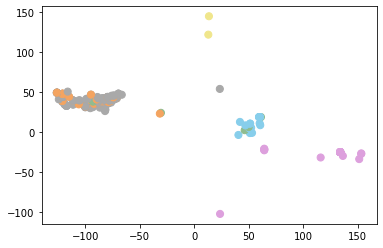

In [887]:
# location women: All
df_women_all = women.loc[:,['rank','latitude','longitude']]

X_w_all = scale(df_women_all)


num_clusters = 6


color_theme = np.array(['darkgray','plum', 'darkseagreen', 'sandybrown', 'skyblue', 'khaki', 'mediumpurple', 'black', 'brown', 'pink', 'lightblue', 'lightgreen', 'teal'])

clustering = KMeans(n_clusters=num_clusters, random_state=3)

clustering.fit(X_w_all)



df_women_all['cluster_label'] = kmeans.fit_predict(df_women_all[df_women_all.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(df_women_all[df_women_all.columns[1:3]]) # Labels of each point

df_women_all.head(10)



plt.scatter(x=df_women_all['longitude'],y=df_women_all['latitude'],c=color_theme[clustering.labels_],s=50)

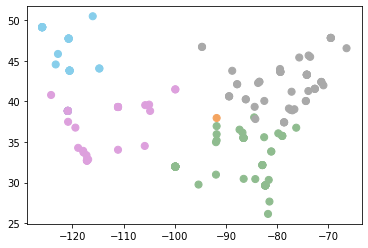

In [879]:
# location women us
mask = (df_women['longitude'] >= -135) & (df_women['longitude'] <= -60) & (df_women['latitude'] >= 25) & (df_women['latitude'] <= 60) #& (df_women['age'] <= 34) & (df_women['rank'] <= 50)

l = df_women.loc[mask]

df_women_us=l.loc[:,['rank','latitude','longitude']]

X_w_us = scale(df_women_us)



num_clusters = 5



color_theme = np.array(['darkgray','plum', 'darkseagreen', 'sandybrown', 'skyblue', 'khaki', 'mediumpurple', 'black', 'brown', 'pink', 'lightblue', 'lightgreen', 'teal'])

clustering = KMeans(n_clusters=num_clusters, random_state=5)

clustering.fit(X_w_us)



df_women_us['cluster_label'] = kmeans.fit_predict(df_women_us[df_women_us.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(df_women_us[df_women_us.columns[1:3]]) # Labels of each point

df_women_us.head(10)



plt.scatter(x=df_women_us['longitude'],y=df_women_us['latitude'],c=color_theme[clustering.labels_],s=50)

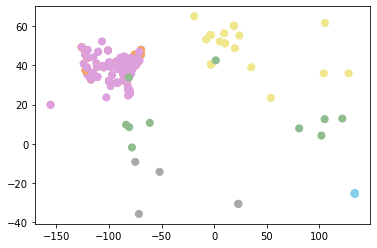

In [882]:
# location men: All
df_men_all = men.loc[:,['rank','latitude','longitude']]

X_m_all = scale(df_men_all)


num_clusters = 6


color_theme = np.array(['darkgray','plum', 'darkseagreen', 'sandybrown', 'skyblue', 'khaki', 'mediumpurple', 'black', 'brown', 'pink', 'lightblue', 'lightgreen', 'teal'])

clustering = KMeans(n_clusters=num_clusters, random_state=3)

clustering.fit(X_m_all)



df_men_all['cluster_label'] = kmeans.fit_predict(df_men_all[df_men_all.columns[1:3]])

centers = kmeans.cluster_centers_ # Coordinates of cluster centers.

labels = kmeans.predict(df_men_all[df_men_all.columns[1:3]]) # Labels of each point

df_men_all.head(10)



plt.scatter(x=df_men_all['longitude'],y=df_men_all['latitude'],c=color_theme[clustering.labels_],s=50)

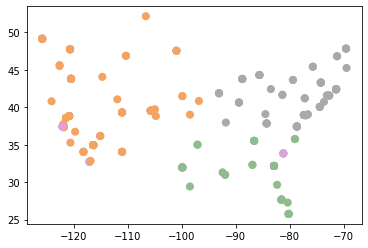

In [885]:
# location men us
mask = (df_men['longitude'] >= -135) & (df_men['longitude'] <= -60) & (df_men['latitude'] >= 25) & (df_men['latitude'] <= 60) #& (df_women['age'] <= 34) & (df_women['rank'] <= 50)
l = df_men.loc[mask]
df_men_us=l.loc[:,['rank','latitude','longitude']]
X_m_us = scale(df_men_us)



num_clusters = 4



color_theme = np.array(['darkgray','plum', 'darkseagreen', 'sandybrown', 'skyblue', 'khaki', 'mediumpurple', 'black', 'brown', 'pink', 'lightblue', 'lightgreen', 'teal'])
clustering = KMeans(n_clusters=num_clusters, random_state=5)
clustering.fit(X_m_us)



df_men_us['cluster_label'] = kmeans.fit_predict(df_men_us[df_men_us.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(df_men_us[df_men_us.columns[1:3]]) # Labels of each point
df_men_us.head(10)



plt.scatter(x=df_men_us['longitude'],y=df_men_us['latitude'],c=color_theme[clustering.labels_],s=50)

# All men clustering

In [743]:
# All men clustering setups
clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(X_m)
df.columns = ['rank', 'age', 'run5k', 'pullups', 'fran', 'longitude', 'latitude']

### Pullups

Text(0.5, 1.0, 'K-Means Classification Pullups')

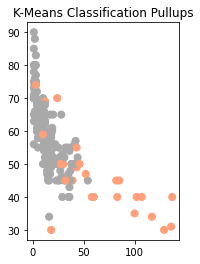

In [744]:
color_theme = np.array(['darkgray','lightsalmon', 'blue'])

plt.subplot(1,2,2)
plt.scatter(x=df_men['rank'],y=df_men['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups')

### Run 5k

Text(0.5, 1.0, 'K-Means Classification Run5k')

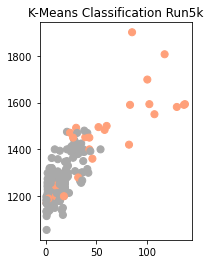

In [745]:
plt.subplot(1,2,2)
plt.scatter(x=df['rank'],y=df['run5k'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Run5k')

## Seperate by Age Group

In [746]:
# df2 = df.iloc[:, lambda x: x.index >= 18 and x.index <= 34]
# df2 = df['age'].between(18, 34, inclusive=True)
mask = (df['age'] >= 18) & (df['age'] <= 34)
df2 = df.loc[mask]
df2.head()
x = scale(df2)
clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(x)

KMeans(n_clusters=2, random_state=5)

Text(0.5, 1.0, 'K-Means Classification Fran')

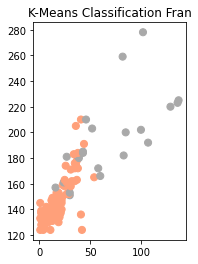

In [747]:
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['fran'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Fran')

Text(0.5, 1.0, 'K-Means Classification Pullups by age')

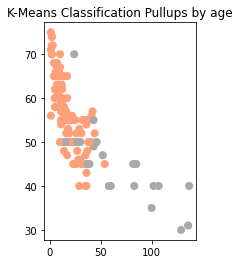

In [748]:
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups by age')

Text(0.5, 1.0, 'K-Means Classification Location')

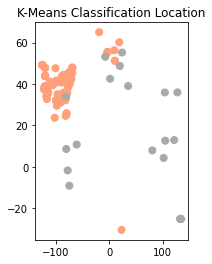

In [749]:
plt.subplot(1,2,2)
plt.scatter(x=df2['longitude'],y=df2['latitude'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Location')

Text(0.5, 1.0, 'K-Means Classification Pullups by age')

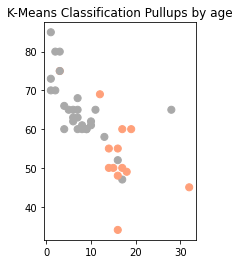

In [750]:
mask = (df['age'] >= 34) & (df['age'] <= 39)
df2 = df.loc[mask]
df2.head()
x = scale(df2)
clustering = KMeans(n_clusters=2,random_state=5)
clustering.fit(x)
plt.subplot(1,2,2)
plt.scatter(x=df2['rank'],y=df2['pullups'],c=color_theme[clustering.labels_],s=50)
plt.title('K-Means Classification Pullups by age')